In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset from OpenML using scikit-learn
titanic = fetch_openml('titanic', version=1, as_frame=True)
data = titanic.frame.copy()  # Use .copy() to avoid chained assignment issues

# Preprocessing: Handle missing values without inplace operations
data['age'] = data['age'].fillna(data['age'].median())
data['fare'] = data['fare'].fillna(data['fare'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)

# Define features and target variable.
# Note: The column names in the OpenML Titanic dataset are lowercase.
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
X = data[features]
y = data['survived']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for models that require it (e.g., SVM, MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# SVM Classifier Module
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
svm_preds = svm.predict(X_test_scaled)

# Output the performance metrics
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.7709923664122137
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       144
           1       0.88      0.57      0.69       118

    accuracy                           0.77       262
   macro avg       0.80      0.75      0.75       262
weighted avg       0.80      0.77      0.76       262



Inferences:
Accuracy: Approximately 77%.

Non-survivors (Class 0): High recall (94%) but moderate precision (73%).

Survivors (Class 1): High precision (88%) but low recall (57%).

In [9]:
# MLP Classifier Module
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, learning_rate_init=0.001, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
mlp_preds = mlp.predict(X_test_scaled)

# Output the performance metrics
print("MLP Accuracy:", accuracy_score(y_test, mlp_preds))
print("MLP Classification Report:")
print(classification_report(y_test, mlp_preds))


MLP Accuracy: 0.7786259541984732
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       144
           1       0.86      0.61      0.71       118

    accuracy                           0.78       262
   macro avg       0.80      0.76      0.77       262
weighted avg       0.79      0.78      0.77       262



C:\Users\kmgs4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Inferences:
Accuracy: ~77.9%

Class 0: High recall (92%), moderate precision (74%).

Class 1: High precision (86%), lower recall (61%).

In [10]:
# Random Forest Classifier Module
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Tree-based methods work well on unscaled data

# Make predictions on the test set
rf_preds = rf.predict(X_test)

# Output the performance metrics
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.7900763358778626
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       144
           1       0.82      0.69      0.75       118

    accuracy                           0.79       262
   macro avg       0.80      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



Inferences:
Accuracy: ~79%

Class 0 (Non-survivors): Precision 77%, Recall 88% (F1-score 82%).

Class 1 (Survivors): Precision 82%, Recall 69% (F1-score 75%).

In [12]:
# Gradient Boosting Classifier Module
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)  # Tree-based methods work well on unscaled data

# Make predictions on the test set
gb_preds = gb.predict(X_test)

# Output the performance metrics
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))


Gradient Boosting Accuracy: 0.7709923664122137
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.85      0.59      0.70       118

    accuracy                           0.77       262
   macro avg       0.79      0.75      0.76       262
weighted avg       0.79      0.77      0.76       262



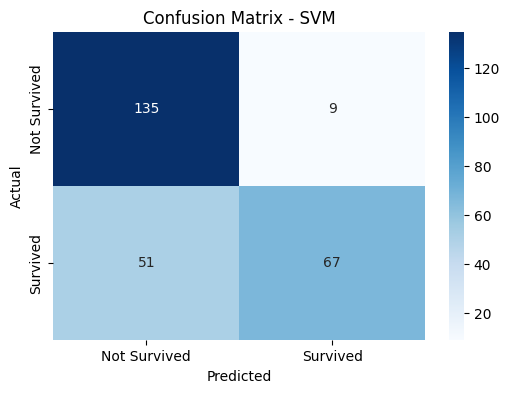

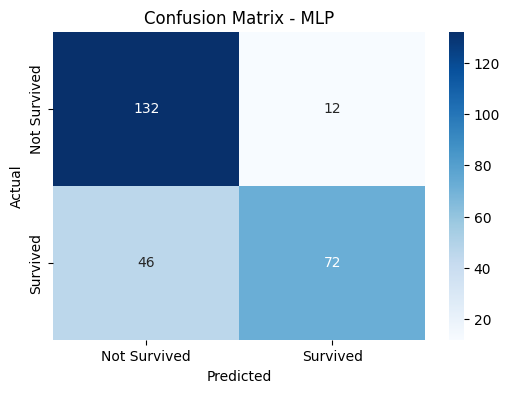

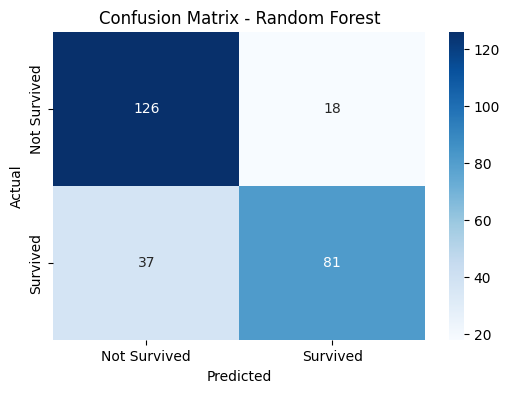

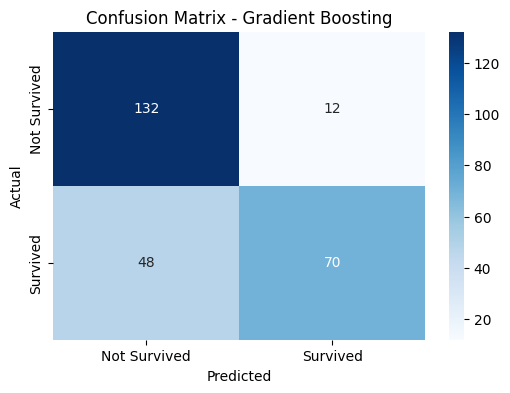

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Dictionary containing model predictions and their names
predictions = {
    "SVM": svm_preds,
    "MLP": mlp_preds,
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds
}

# Plot a confusion matrix for each classifier
for model_name, preds in predictions.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Survived", "Survived"],
                yticklabels=["Not Survived", "Survived"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Inferences:
Accuracy: ~77%

Class 0 (Non-survivors): Precision 73%, Recall 92%

Class 1 (Survivors): Precision 85%, Recall 59%

Final Summary of Model Performance:
SVM:

Accuracy: ~77%

Observation: High recall for non-survivors (94%) but lower recall for survivors (57%).

MLP:

Accuracy: ~77.9%

Observation: Similar to SVM, with balanced performance overall but still missing some survivors.

Random Forest:

Accuracy: ~79%

Observation: Offers balanced performance for both classes, with slightly higher accuracy than SVM and MLP.

Gradient Boosting:

Accuracy: ~77%

Observation: Effectively identifies non-survivors (high recall of 92%) while underperforming on survivors (recall of 59%).